# Is Friday the 13th Associated with More Injuries?

The association of Friday the 13th with bad luck is a popular superstition that inspired many movies and video games. **Paraskevidekatriaphobia** is the fear of Friday the 13th. While this might be considered an irrational fear, I think it would be interesting to see if people do experience more bad luck on Friday the 13th.

One way I can achieve that is by determining if more injuries occur on that day compared to others. The National Electronic Injury Surveillance System dataset is a collection of product-related injuries in the United States collected by the U.S. Consumer Product Safety Commission (CPSC). Using data from the last 5 years, I performed an analysis to see if more injuries occur on Friday the 13th, which could be attributed to bad luck.


**Summary of Findings:**
- The NEISS 2017-2021 dataset contains 1,757,100 rows and 25 variables such as date, demographics, body part injured, diagnosis, etc.
- 8,406 injuries occurred on Friday the 13th, which occurred 9 times during this time period.
- The number of injuries appear to be more associated with the time of the year rather than Friday the 13th.
- While men tend to get more injured than women, there does not appear to be a significant difference in the proportion of injuries between Friday the 13th and other days.
- People are more likely to get sports-related and school-related injuries on Friday the 13th, but this is most likely due to sports activities occurring more often at school on Fridays.
- Overall, there does not appear to be a signicant difference in the proportion of injuries when it comes to sex, injured body parts, diagnoses, product, and location between Friday the 13th and other dates.

## 1. Introduction

### 1.1 Loading Packages

These are the packages I used in this project.

In [1]:
# Import packages used in the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.2 Viewing the Dataset

Data from the years 2017 to 2021 were retrieved from the [CPSC website](https://www.cpsc.gov/cgibin/NEISSQuery/home.aspx). Since the data were stored in multiple excel files, I performed some data cleaning with the following scripts:

1. *excel_to_csv.py* - convert excel sheets into csv files.
2. *preprocessing.py* - map values and combine all data from all years into a single csv file.

Due to the finalized dataset's large size, I only included a sample in my Github in the file *NEISS_17-21_sample.csv*.

In [2]:
# Import data. Set low_memory to False to remove warning.
df = pd.read_csv('data/NEISS_17-21.csv', low_memory=False)

In [3]:
# Preview the data
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,...,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative,Stratum,PSU,Weight
0,170100733,2017-01-01,21.0,MALE,WHITE,NaN,NaN,HEAD,INTERNAL INJURY,NaN,...,NO/?,"BOXING (ACTIVITY, APPAREL OR EQUIPMENT)",0,0,NaN,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,S,46,77.6641
1,170100734,2017-01-01,71.0,MALE,WHITE,NaN,NaN,UPPER TRUNK,"CONTUSIONS, ABR.",NaN,...,NO/?,FLOORS OR FLOORING MATERIALS,0,0,NaN,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,S,46,77.6641
2,170100735,2017-01-01,16.0,MALE,WHITE,NaN,NaN,LOWER ARM,"BURNS, THERMAL",NaN,...,NO/?,"RUGS OR CARPETS, NOT SPECIFIED","FIREPLACES, NOT SPECIFIED",0,NaN,NaN,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,S,46,77.6641
3,170100737,2017-01-01,55.0,FEMALE,WHITE,NaN,NaN,HEAD,INTERNAL INJURY,NaN,...,NO/?,STEP STOOLS,0,0,NaN,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,S,46,77.6641
4,170100740,2017-01-01,86.0,FEMALE,WHITE,NaN,NaN,LOWER TRUNK,HEMATOMA,NaN,...,NO/?,OUTERWEAR,"CABINETS, RACKS, ROOM DIVIDERS AND SHELVES, NEC",0,NaN,NaN,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,S,46,77.6641


In [4]:
# View structure of the data and list of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757100 entries, 0 to 1757099
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CPSC_Case_Number   int64  
 1   Treatment_Date     object 
 2   Age                float64
 3   Sex                object 
 4   Race               object 
 5   Other_Race         object 
 6   Hispanic           object 
 7   Body_Part          object 
 8   Diagnosis          object 
 9   Other_Diagnosis    object 
 10  Body_Part_2        object 
 11  Diagnosis_2        object 
 12  Other_Diagnosis_2  object 
 13  Disposition        object 
 14  Location           object 
 15  Fire_Involvement   object 
 16  Product_1          object 
 17  Product_2          object 
 18  Product_3          object 
 19  Alcohol            object 
 20  Drug               object 
 21  Narrative          object 
 22  Stratum            object 
 23  PSU                int64  
 24  Weight             float64
dtypes: float64(2), int

There are a total of **1,757,100 rows** and **25 variables**. 

<Figure size 864x648 with 0 Axes>

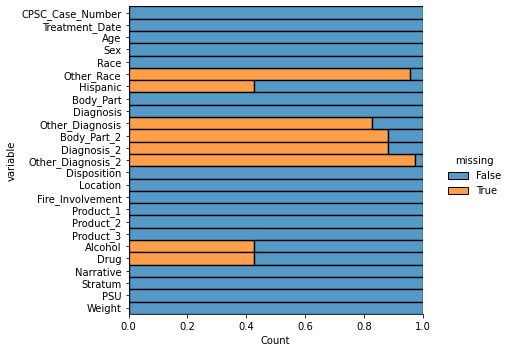

In [5]:
# Check for missing values
plt.figure(figsize=(12,9))
sns.displot(data=df.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25)
plt.savefig("images/missing_values.png", dpi=100)

Based on the plot above, a large proportion of the following variables have missing values:

- *Other_Race*
- *Hispanic*
- *Other_Diagnosis*
- *Body_Part_2*
- *Diagnosis_2*
- *Other_Diagnosis_2*
- *Alcohol*
- *Drug*

In [6]:
# Count the number of unique values for each variable
df.nunique()

CPSC_Case_Number     1757100
Treatment_Date          1826
Age                      136
Sex                        4
Race                       7
Other_Race               269
Hispanic                   3
Body_Part                 26
Diagnosis                 30
Other_Diagnosis        15398
Body_Part_2               26
Diagnosis_2               30
Other_Diagnosis_2       3322
Disposition                7
Location                   9
Fire_Involvement           4
Product_1                798
Product_2                752
Product_3                563
Alcohol                    2
Drug                       2
Narrative            1747080
Stratum                    5
PSU                       93
Weight                    63
dtype: int64

Many variables indicated by the keyword *other* contain many unique values. 

Next, I checked the value counts of variables with a low number of unique values.

In [7]:
# Check value counts of the following variables
vars_of_interest = ['Race', 'Fire_Involvement', 'Alcohol', 'Drug', 'Disposition']

for var in vars_of_interest:
    print(df[var].value_counts())
    print('\n')

WHITE                               774473
N.S.                                612043
BLACK/AFRICAN AMERICAN              272591
OTHER                                64968
ASIAN                                25223
AMERICAN INDIAN/ALASKA NATIVE         5682
NATIVE HAWAIIAN/PACIFIC ISLANDER      2120
Name: Race, dtype: int64


NO/?     1748492
? FD        3861
FD          2408
NO FD       2339
Name: Fire_Involvement, dtype: int64


No/Unk    988811
Yes        19716
Name: Alcohol, dtype: int64


No/Unk    987807
Yes        20720
Name: Drug, dtype: int64


TREATED/EXAMINED AND RELEASED        1529421
TREATED AND ADMITTED/HOSPITALIZED     167757
LEFT WITHOUT BEING SEEN                26695
TREATED AND TRANSFERRED                16652
HELD FOR OBSERVATION                   15226
FATALITY INCL. DOA, DIED IN ER          1254
UNKNOWN, NOT STATED                       95
Name: Disposition, dtype: int64




The following variables have a large amount of unknown/unspecified values: *Race*, *Fire_Involvement*, *Alcohol*, and *Drug*.

Based on these findings, I have decided to do the following:

- Focus on the primary product, body part, and diagnosis. That is, drop the variables indicated by a "2".
- Drop the variables with many missing, unknown, or unspecified values.
- Drop the variables related to the sampling process of the dataset: *PSU*, *Weight*, and *Stratum*.

### 1.3 Preparing the Dataset

Prior to analysis, I performed the following changes to the dataset:

1. Drop variables that will not be used in the analysis.
2. Change the *Treatment_Date* data type to datetime.
3. Create a new column, *Friday_the_13th*, to indicate whether the date is on Friday the 13th.

In [8]:
# Drop unused columns
unused_vars = ['Race', 'Other_Race', 'Hispanic', 'Fire_Involvement', 'Product_2', 'Product_3', 'Body_Part_2',
               'Diagnosis_2', 'Other_Diagnosis_2', 'Alcohol', 'Drug', 'Narrative', 'Stratum', 'PSU', 'Weight']
df.drop(unused_vars, axis=1, inplace=True)

# Change Treatment Date data type to datetime
df['Treatment_Date'] = pd.to_datetime(df['Treatment_Date'])

# Add ccolumn to represent Friday the 13th
df['Friday_the_13th'] = np.where((df['Treatment_Date'].dt.dayofweek == 4) &
                                 (df['Treatment_Date'].dt.day == 13), "Yes", "No")

In [9]:
# View Friday the 13th dates
df[['CPSC_Case_Number', 'Treatment_Date']][df['Friday_the_13th'] == "Yes"].nunique()

CPSC_Case_Number    8406
Treatment_Date         9
dtype: int64

In [10]:
df['Treatment_Date'][df['Friday_the_13th'] == "Yes"].unique()

array(['2017-01-13T00:00:00.000000000', '2017-10-13T00:00:00.000000000',
       '2018-04-13T00:00:00.000000000', '2018-07-13T00:00:00.000000000',
       '2019-09-13T00:00:00.000000000', '2019-12-13T00:00:00.000000000',
       '2020-03-13T00:00:00.000000000', '2020-11-13T00:00:00.000000000',
       '2021-08-13T00:00:00.000000000'], dtype='datetime64[ns]')

There are 8,406 injuries that occurred on Friday the 13th across 9 different dates during the years 2017 - 2021. These dates are:

- January 13, 2017
- October 13, 2017
- April 13, 2018
- July 13, 2018
- September 13, 2019
- December 13, 2019
- March 13, 2020
- November 13, 2020
- August 13, 2021

## 2. Exploring the NEISS Dataset

This section of the project focuses on comparing injuries that occurred on Friday the 13th vs. other days. *Treatment_Date* will be used as a proxy for the date the injury occurred.

### 2.1 Notebook Formatting

For consistency and readability, I set some formatting parameters to be used throughout this notebook. 

In [11]:
# Set plot formatting for consistency
sns.set_context("talk", font_scale=1)

# Set data frame formatting
pd.options.display.float_format='{:,.2f}'.format

### 2.2 Number of Injuries

I plotted the number of injuries per day to see if more injuries occur on Friday the 13th compared to other days.

In [12]:
# Calculate number of injuries per date
df_cases = df[['Treatment_Date', 'CPSC_Case_Number']].groupby('Treatment_Date', as_index=False).count()

# Create Friday the 13th column
df_cases['Friday_the_13th'] = np.where((df_cases['Treatment_Date'].dt.dayofweek == 4) &
                                 (df_cases['Treatment_Date'].dt.day == 13), "Yes", "No")

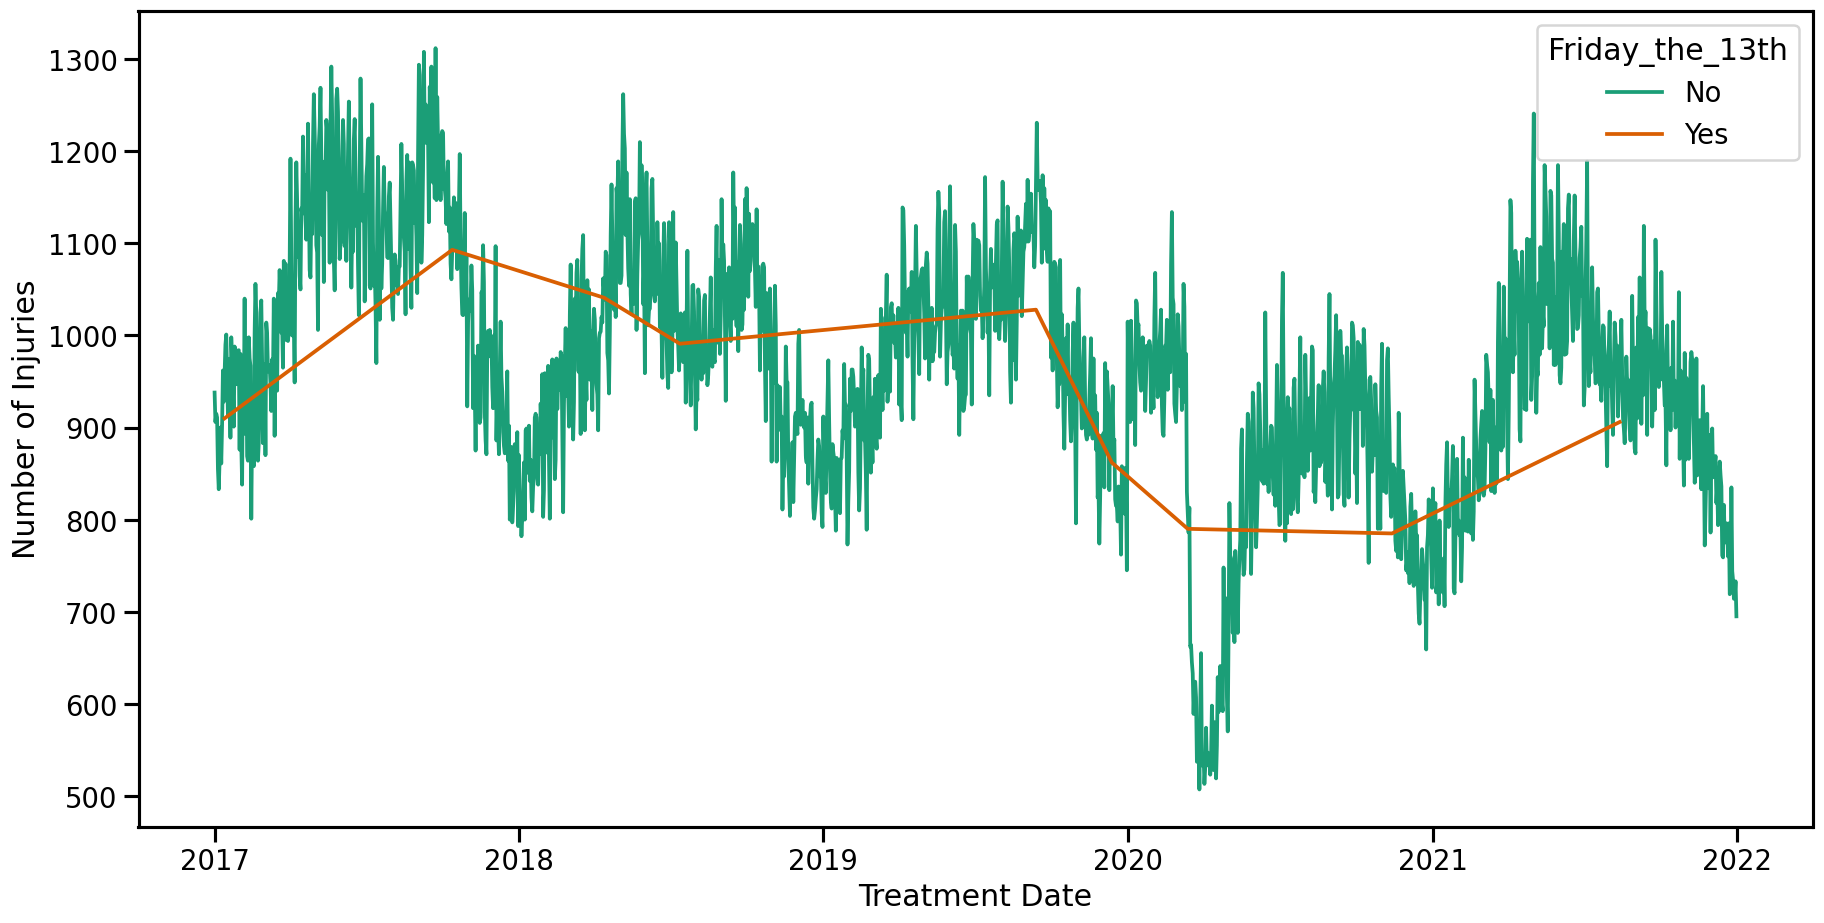

In [13]:
# Plot number of injuries by date
plt.figure(figsize=(18, 9), dpi=120)
ax = sns.lineplot(x='Treatment_Date', y='CPSC_Case_Number', hue='Friday_the_13th', data=df_cases, palette="Dark2")
ax.set(xlabel='Treatment Date', ylabel='Number of Injuries')
plt.savefig('images/injuries.png')

Due to the large amount of noise in the data, I decided to calculate the rolling average with a window of 7 days to smooth out the plot.

In [14]:
# Set treatment date as index
df_cases.set_index('Treatment_Date', inplace=True)

# Calculate 7-day rolling average
df_cases_rolling = df_cases.rolling(window=7).mean()

# Reset index
df_cases_rolling.reset_index(inplace=True)

# Create Friday the 13th column
df_cases_rolling['Friday_the_13th'] = np.where((df_cases_rolling['Treatment_Date'].dt.dayofweek == 4) &
                                 (df_cases_rolling['Treatment_Date'].dt.day == 13), "Yes", "No")

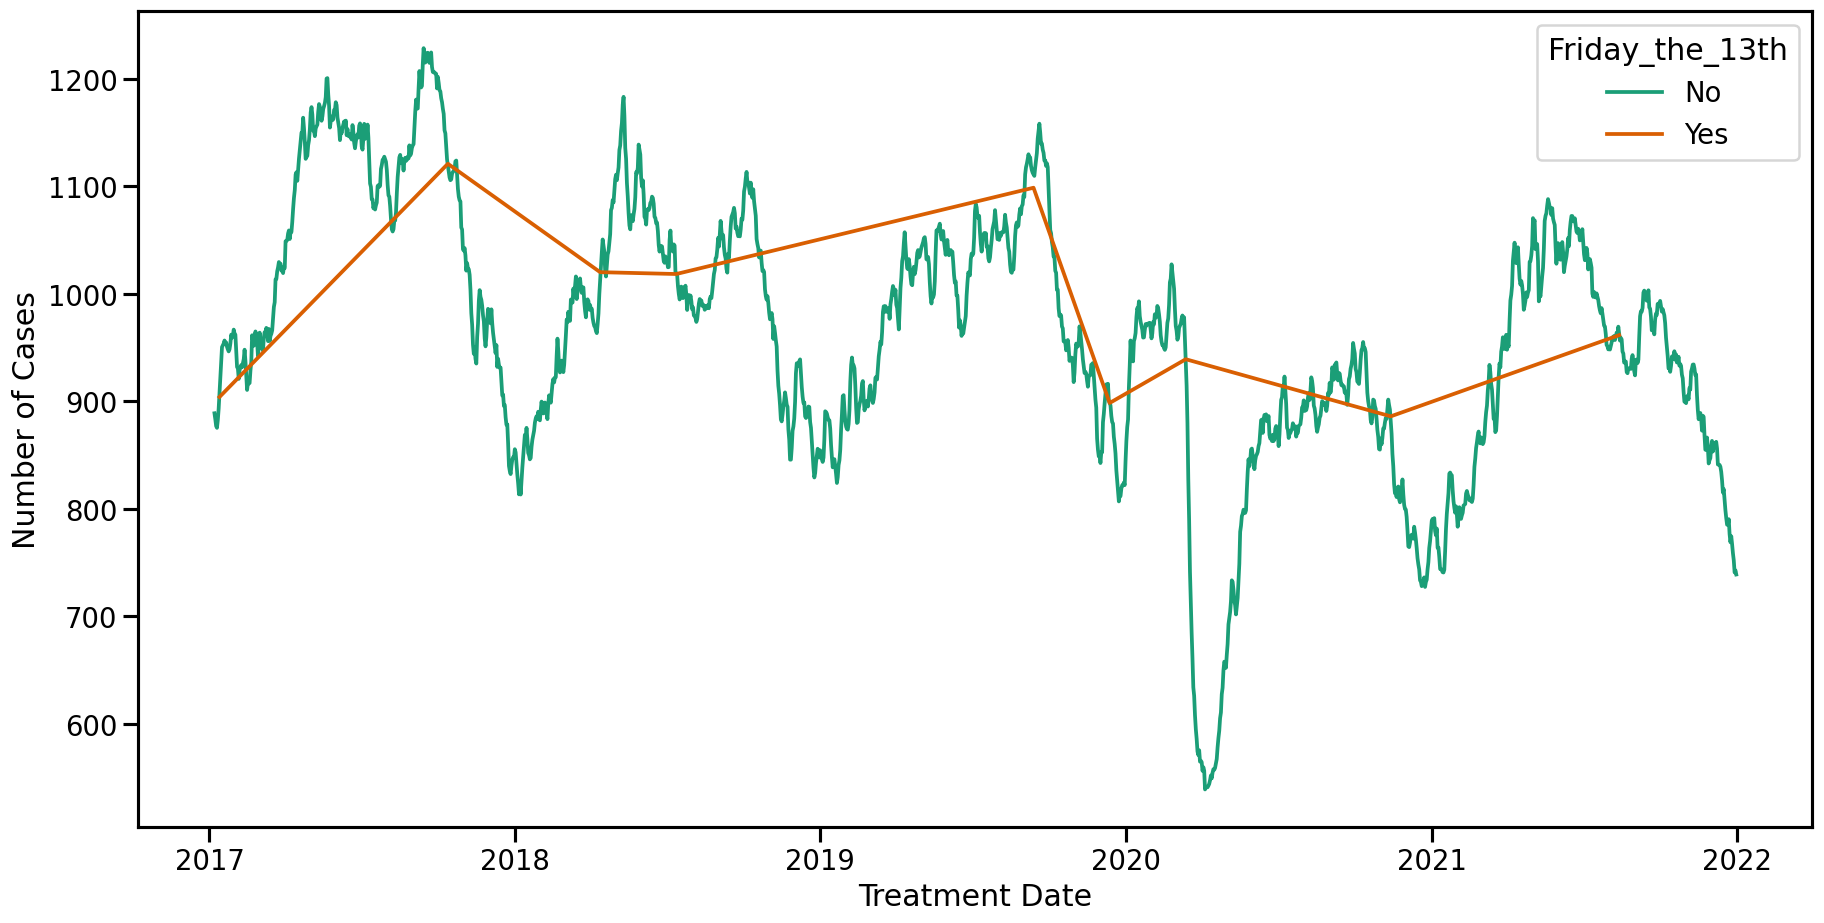

In [15]:
# Plot rolling average
plt.figure(figsize=(18, 9), dpi=120)
ax = sns.lineplot(x='Treatment_Date', y='CPSC_Case_Number', hue='Friday_the_13th', data=df_cases_rolling, palette="Dark2")
ax.set(xlabel='Treatment Date', ylabel='Number of Cases')
plt.savefig('images/injuries_rolling.png')

As shown by the graph, there does not appear to be a significant difference in the number of injuries during Friday the 13th compared to other days. The number of injuries appear to be more associated with the time of year. There is also a sharp decrease in the overall number of injuries starting in March 2020, when lockdown for the COVID-19 pandemic began.

Next, I looked at the number of cases per month to see which months have the highest number of injuries.

In [16]:
# Create new columns to indicate the month and the year
df['month'] = df['Treatment_Date'].dt.month
df['year'] = df['Treatment_Date'].dt.year

# Calculate the number of cases per month
df_monthly_cases = df[['month', 'year', 'CPSC_Case_Number']].groupby(['month','year'], as_index=False).count()

In [17]:
# View the top 3 monthly number of cases each year
for year in df_monthly_cases['year'].unique():
    
    print('Year: ' + str(year))  
    print(df_monthly_cases[df_monthly_cases['year'] == year].sort_values('CPSC_Case_Number', ascending=False).head(3))

Year: 2017
    month  year  CPSC_Case_Number
20      5  2017             36224
40      9  2017             36110
30      7  2017             34657
Year: 2018
    month  year  CPSC_Case_Number
21      5  2018             34442
46     10  2018             32502
41      9  2018             31821
Year: 2019
    month  year  CPSC_Case_Number
42      9  2019             33807
37      8  2019             32807
32      7  2019             32743
Year: 2020
    month  year  CPSC_Case_Number
3       1  2020             29936
8       2  2020             28336
38      8  2020             27996
Year: 2021
    month  year  CPSC_Case_Number
24      5  2021             32775
29      6  2021             31546
34      7  2021             30625


In [18]:
# View the top 3 lowest monthly number of cases each year
for year in df_monthly_cases['year'].unique():
    
    print('Year: ' + str(year))  
    print(df_monthly_cases[df_monthly_cases['year'] == year].sort_values('CPSC_Case_Number').head(3))

Year: 2017
    month  year  CPSC_Case_Number
5       2  2017             26314
55     12  2017             27846
0       1  2017             28917
Year: 2018
    month  year  CPSC_Case_Number
6       2  2018             25814
1       1  2018             26607
51     11  2018             27197
Year: 2019
    month  year  CPSC_Case_Number
7       2  2019             25439
57     12  2019             26548
2       1  2019             26818
Year: 2020
    month  year  CPSC_Case_Number
18      4  2020             17554
58     12  2020             23419
13      3  2020             23559
Year: 2021
    month  year  CPSC_Case_Number
9       2  2021             23150
4       1  2021             24427
59     12  2021             24724


Injuries appear to occur most frequently during the summer especially on the months of May, July, and September. The lowest number of injuries occur during the winter from December to February. 

### 2.3 Top Products Related to Injury

Next, I want to see if the category of product associated with the injury is different on Friday the 13th compared to other days. Since there are hundreds of product categories in the dataset, I focused on the 10 most common ones.

Since I will be performing the same analysis on other variables, I decided to define two functions:

1. **get_top_ten_frequency()** - calculates the relative frequency of injuries in each category for each group (Friday the 13th vs. other days) and outputs the top 10
2. **plot_top_ten()** - plots the relative frequency of injuries in each category

In [19]:
# Define function to calculate and retrieve the top ten relative frequency
def get_top_ten_frequency(df, var):
    
    # Calculate relative frequency for each product for each group
    df_pc = ((df.groupby(['Friday_the_13th', var]).size() / df.groupby(['Friday_the_13th']).size())*100).round(2).reset_index().rename({0:'percent'}, axis=1)
    
    # Obtain the top ten for non-Friday-the-13th dates
    top_nft = df_pc[df_pc['Friday_the_13th'] == 'No'].nlargest(10, columns='percent')
    
    # Obtain the top ten for Friday-the-13th dates
    top_ft = df_pc[df_pc['Friday_the_13th'] == 'Yes'].nlargest(10, columns='percent')
    
    # Combine top tens
    df_top_ten = top_nft.append(top_ft)
    
    return df_top_ten

In [20]:
# This function plots the top 10
def plot_top_ten(df, var, label):
    
    ax = sns.barplot(x='percent', y=var, hue='Friday_the_13th', data=df, palette="Dark2")
    
    ax.set(xlabel='Percent of Injuries', ylabel=label)
    
    for container in ax.containers:
        ax.bar_label(container)
        
    plt.savefig('images/'+ label + '_plot.png', bbox_inches='tight')

I used the functions to obtain and plot the relative frequencies.

In [21]:
# Obtain top products by relative frequency of injuries
top_products = get_top_ten_frequency(df, 'Product_1')

# Preview dataframe
top_products.head()

,Friday_the_13th,Product_1,percent
283,No,FLOORS OR FLOORING MATERIALS,8.34
675,No,STAIRS OR STEPS,7.97
77,No,"BEDS OR BEDFRAMES, OTHER OR NOT SPECIFIED",5.78
81,No,"BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR AL...",3.28
65,No,"BASKETBALL, ACTIVITY AND RELATED EQUIPMENT",3.25


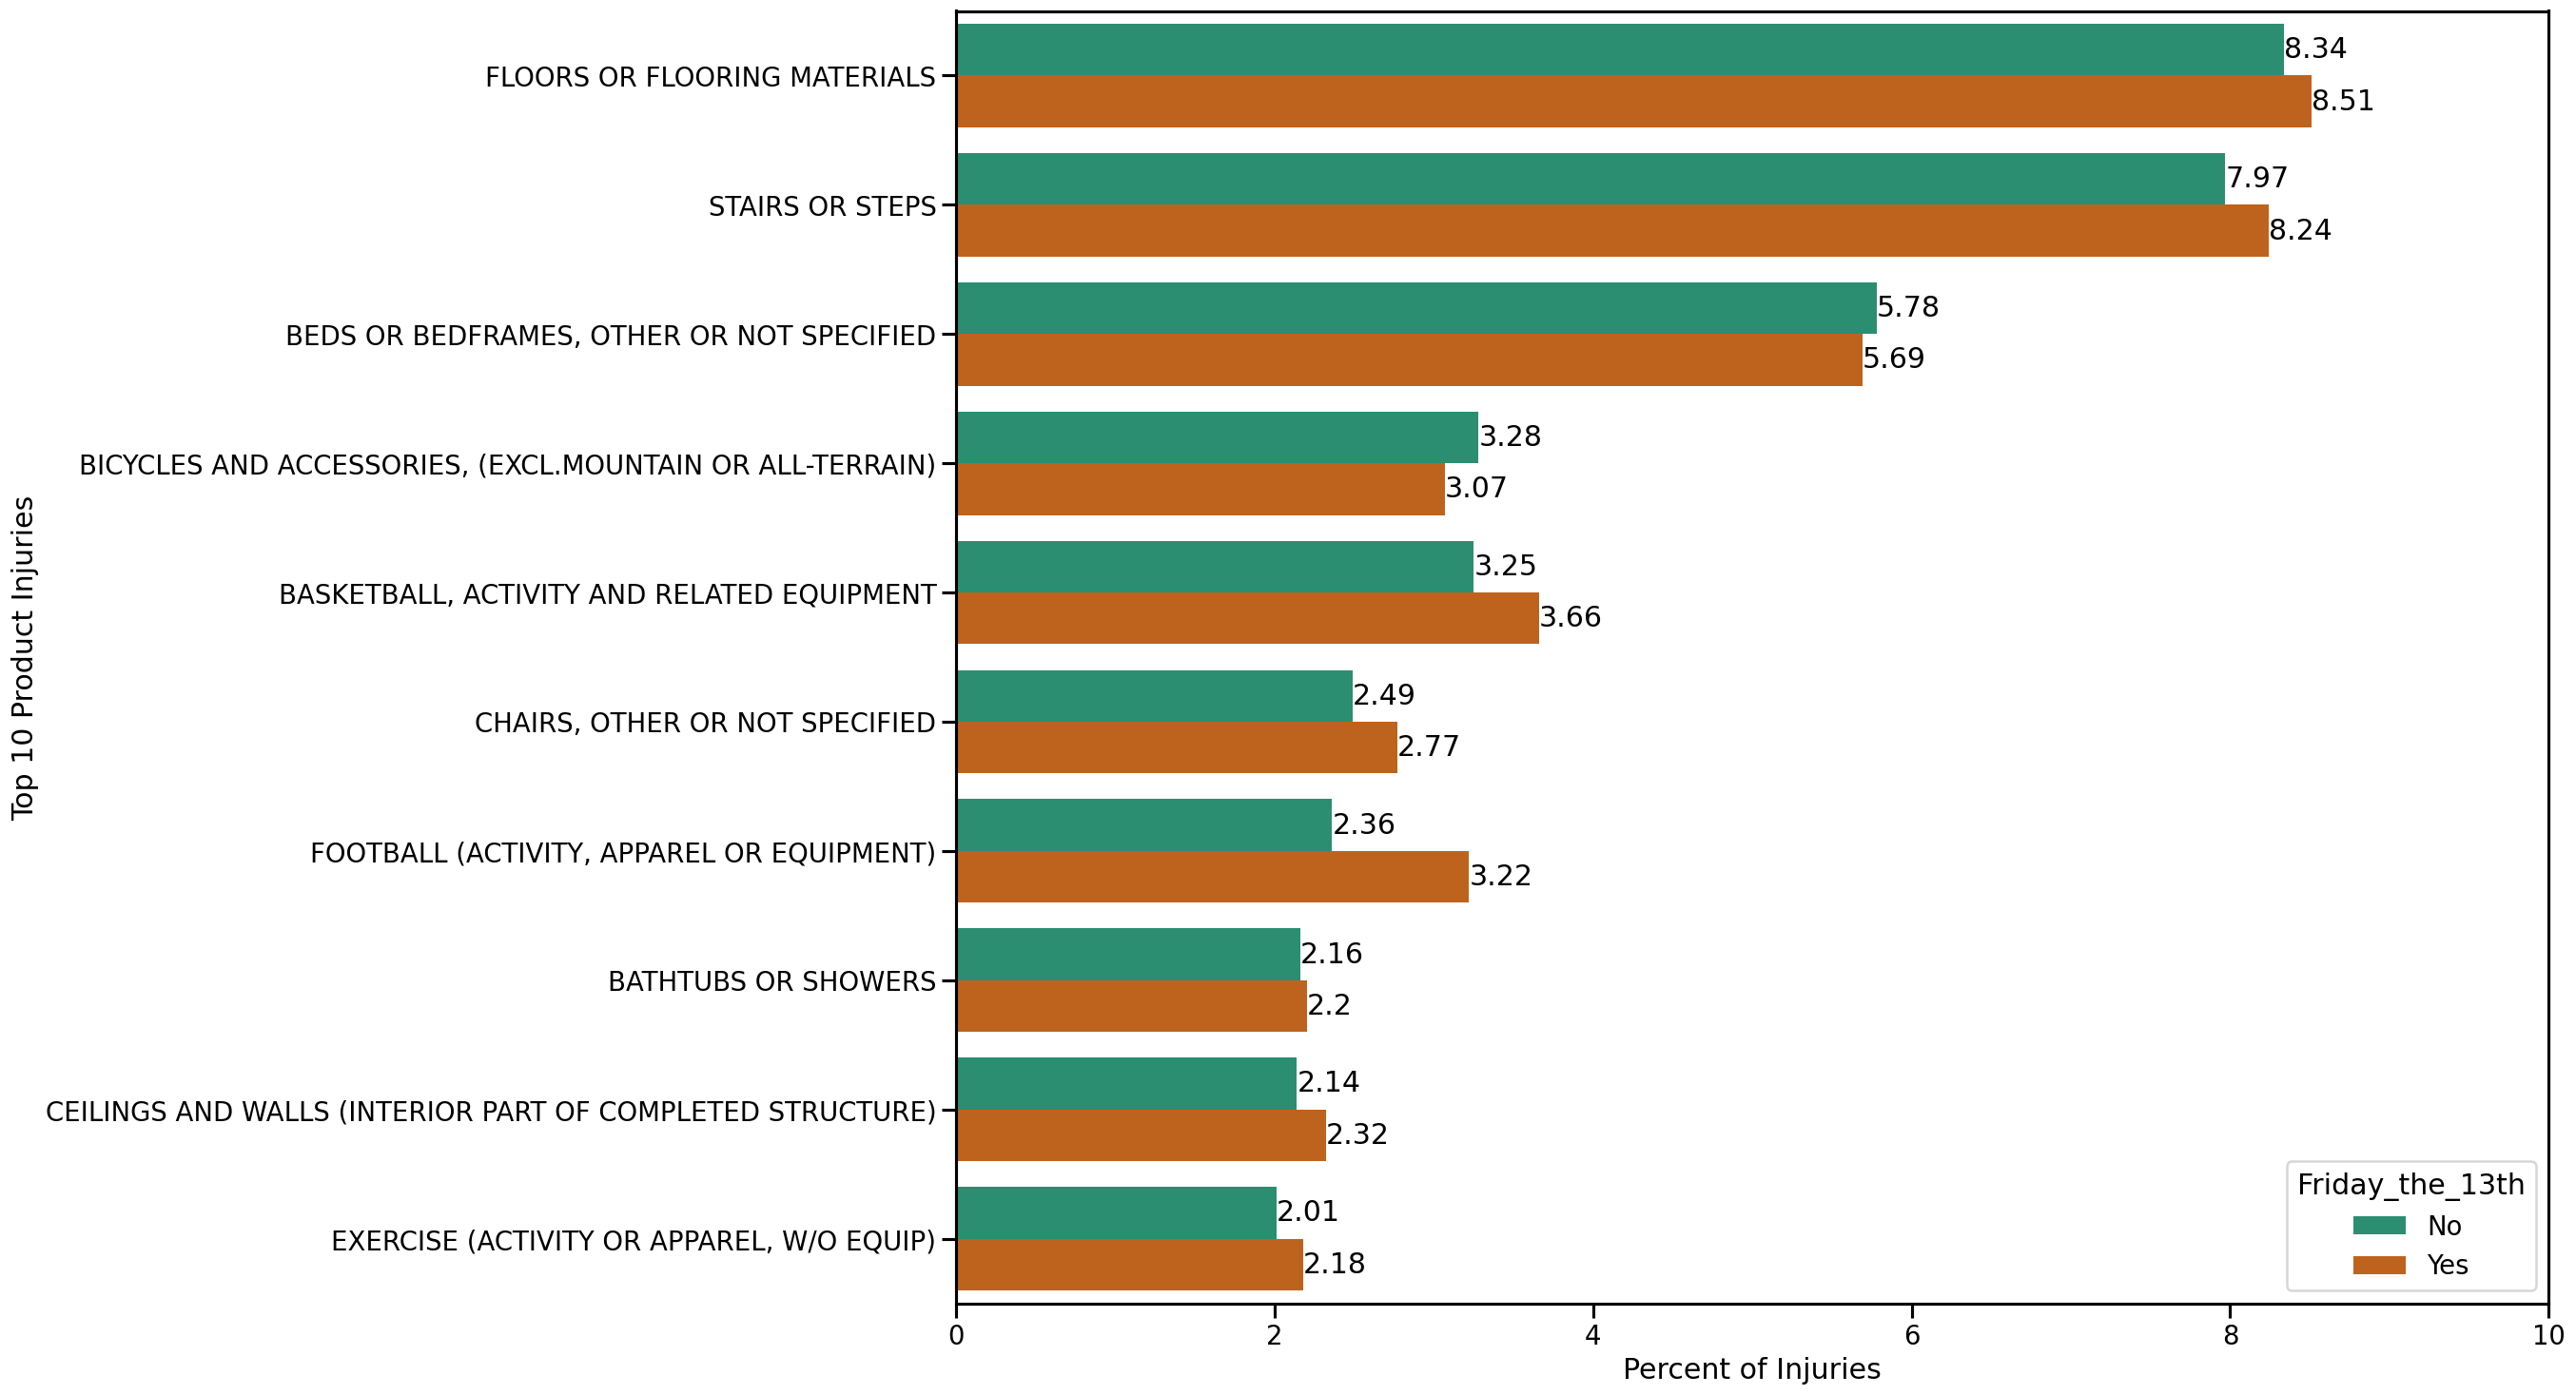

In [22]:
# Plot top ten
plt.figure(figsize=(18, 15), dpi=120)
plt.xlim(0, 10)
plot_top_ten(top_products, 'Product_1', 'Top 10 Product Injuries')

The top 10 products that cause injury are the same (with a slightly different order) for both groups, with *floors/flooring materials* and *stairs/steps* being the most common products associated with injury.

The relative frequency for each category appear to be the same for both groups except for *basketball* and *football* injuries, which have a higher relative frequency on Friday the 13th. However, this is most likely due to football and basketball games occurring more frequently on Fridays.

### 2.4 Top Injured Body Parts

I performed the same analysis on the injured body parts.

In [23]:
# Obtain top injured body parts
top_body_parts = get_top_ten_frequency(df, 'Body_Part')

# Preview dataframe
top_body_parts.head()

,Friday_the_13th,Body_Part,percent
10,No,HEAD,17.16
6,No,FACE,8.73
15,No,LOWER TRUNK,8.13
7,No,FINGER,8.00
24,No,UPPER TRUNK,5.64


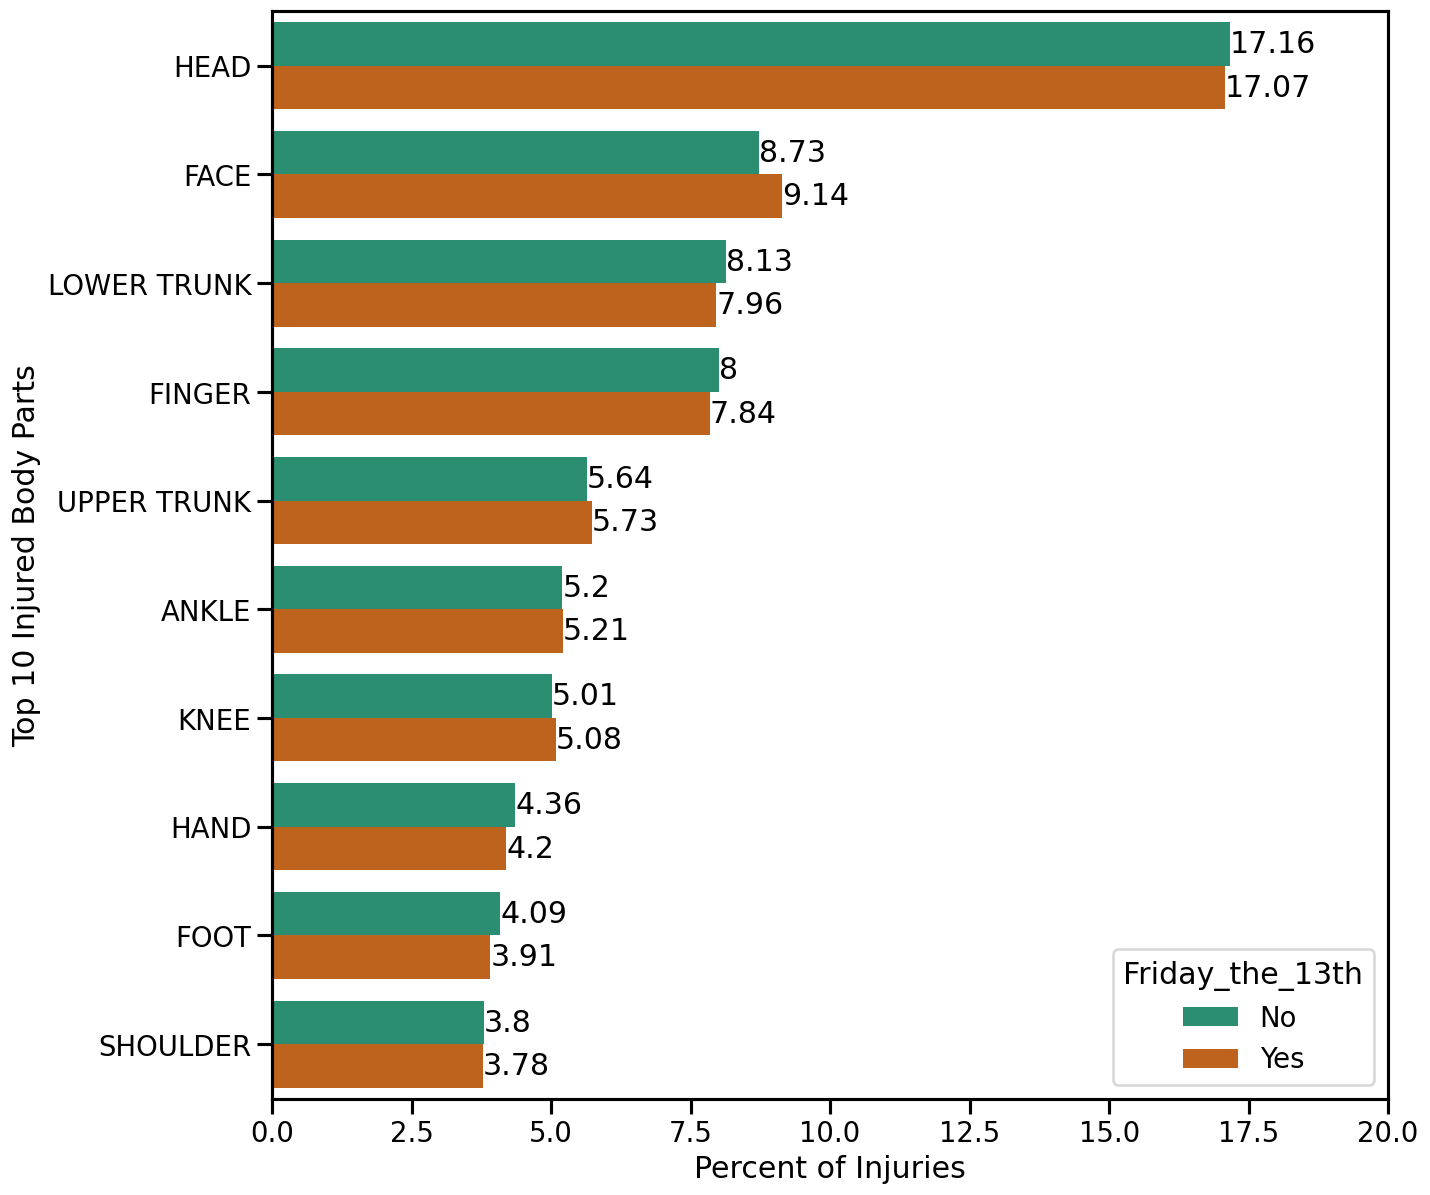

In [24]:
# Plot top ten
plt.figure(figsize=(12, 12), dpi=120)
plt.xlim(0, 20)
plot_top_ten(top_body_parts, 'Body_Part', 'Top 10 Injured Body Parts')

The top 10 most injured body parts are the same for both groups with *head* and *face* being the most injured body part. The relative frequencies are also the same for both groups in all categories. Thus, there does not appear to be a significant difference in the injured body parts between the two groups.

### 2.5 Top Injury Diagnoses

I performed the same analysis on the injury diagnoses.

In [25]:
# Obtain top diagnoses by relative frequency of injuries
top_diagnosis = get_top_ten_frequency(df, 'Diagnosis')

# Preview dataframe
top_diagnosis.head()

,Friday_the_13th,Diagnosis,percent
24,No,OTHER,17.32
22,No,LACERATION,16.94
17,No,FRACTURE,16.26
10,No,"CONTUSIONS, ABR.",12.02
28,No,"STRAIN, SPRAIN",11.13


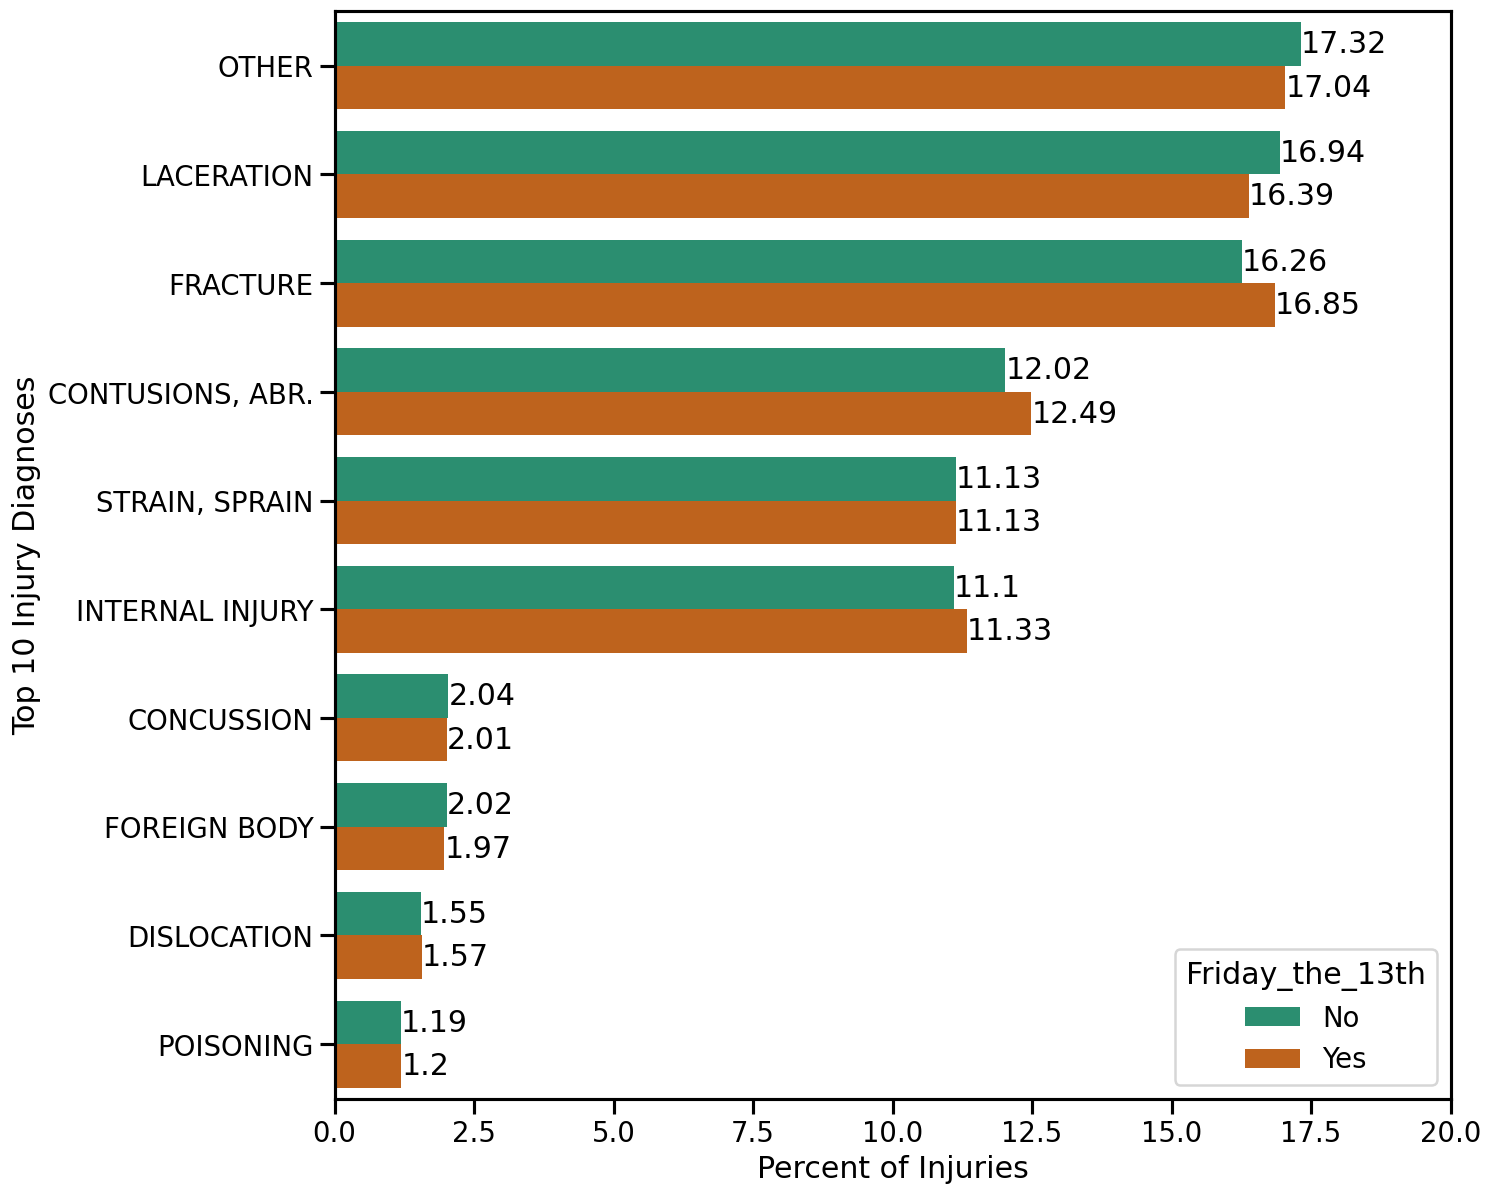

In [26]:
# Plot top diagnoses
plt.figure(figsize=(12, 12), dpi=120)
plt.xlim(0, 20)
plot_top_ten(top_diagnosis, 'Diagnosis', 'Top 10 Injury Diagnoses')

In [27]:
# Check the value counts of *Other_Diagnosis*
df['Other_Diagnosis'].value_counts().sort_values(ascending=False).head()

PAIN          123423
INJURY         15163
NS             10761
CELLULITIS      6808
SYNCOPE         5230
Name: Other_Diagnosis, dtype: int64

The top 10 most common injury diagnoses are the same (with a slightly different order) for both groups with *lacerations* and *fractures* being the most common. The most common diagnosis is under the *other* category, with *pain*, *injury*, or *not specified* being the most common values.

The relative frequencies are about the same in all categories for both groups. However, 0.59% more fractures occur on Friday the 13th compared to the other days, but this may be due to fractures being a common injury to obtain during sporting events, which occur frequently on Fridays.

### 2.6 Injury by Location

Next, I looked at the locations where the injury occurred.

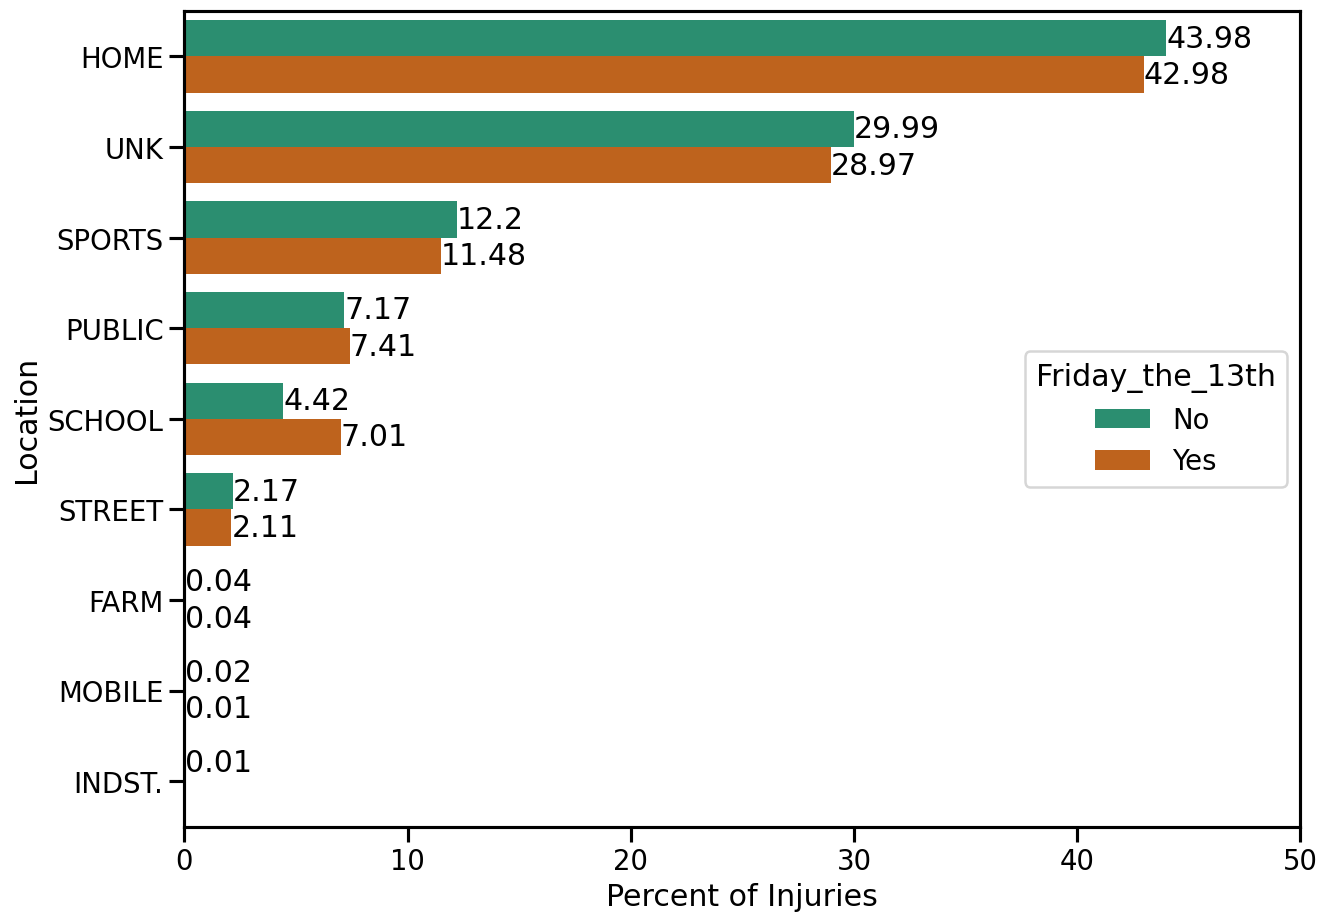

In [28]:
# Calculate relative frequency of injuries by location
top_location = ((df.groupby(['Friday_the_13th', 'Location']).size() / df.groupby(['Friday_the_13th']).size())*100).round(2).reset_index().rename({0:'percent'}, axis=1)
top_location = top_location.sort_values('percent', ascending=False)

# Plot relative frequency of injuries by location
plt.figure(figsize=(12, 9), dpi=120)
plt.xlim(0, 50)
plot_top_ten(top_location, 'Location', 'Location')

The ordering of the relative frequencies for each location are the same for both groups with home being the highest. They are also the same for both groups except for *school*, where 1.5 times more injuries occur on Friday the 13th. However, this may be due to sporting events taking place frequently on Fridays, and the weekends being part of the other group, which can lower the relative frequency of school-related injuries.

### 2.7 Injury by Sex

Next, I want to see if a person of a certain sex is more likely to get injured on Friday the 13th. 

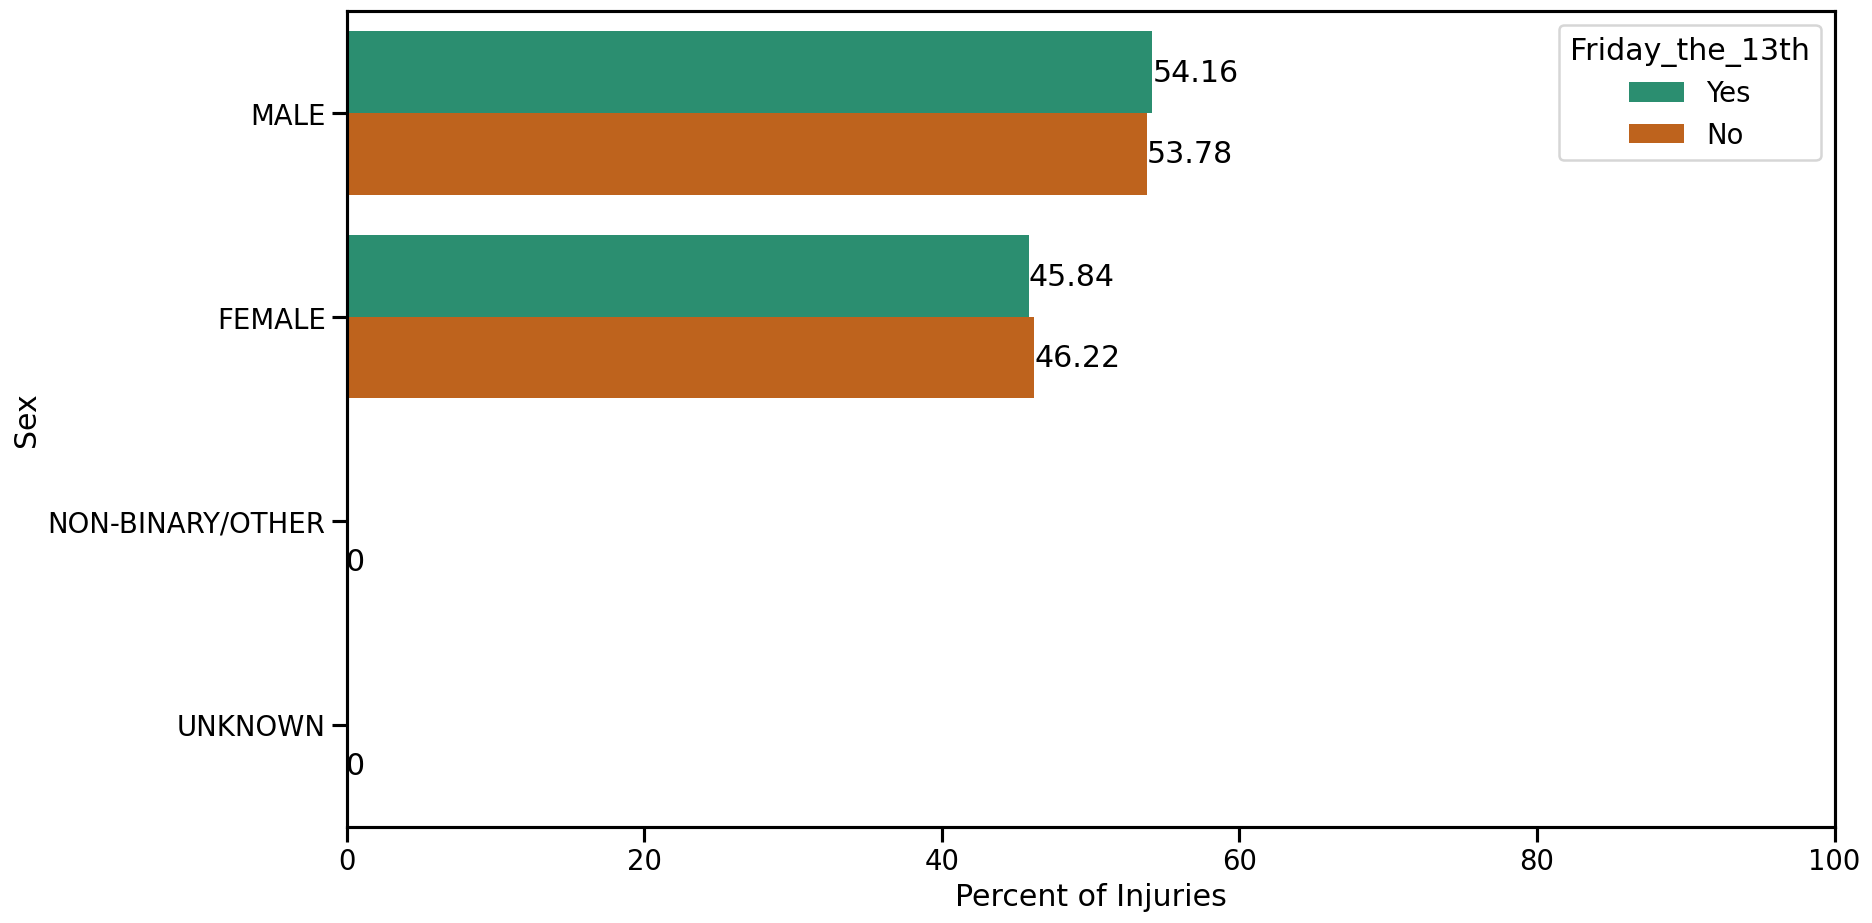

In [29]:
# Plot relative frequency of injuries by sex
top_sex = ((df.groupby(['Friday_the_13th', 'Sex']).size() / df.groupby(['Friday_the_13th']).size())*100).round(2).reset_index().rename({0:'percent'}, axis=1)
top_sex = top_sex.sort_values('percent', ascending=False)

# Plot relative frequency of injuries by sex
plt.figure(figsize=(16, 9), dpi=120)
plt.xlim(0, 100)
plot_top_ten(top_sex, 'Sex', 'Sex')

While men get injured more often than women, the relative frequencies are the same regardless of whether it’s on Friday the 13th or not. 

There are not enough data for people who identify as non-binary. 

### 2.8 Injury By Age

Finally, I want to see if a person of a certain age is more likely to get injured on Friday the 13th.

In [30]:
# View numerical summary of age for each group
df[['Friday_the_13th', 'Age']].groupby('Friday_the_13th').describe()

Age                                          
                       count  mean   std  min   25%   50%   75%    max
Friday_the_13th                                                       
No              1,748,694.00 33.21 27.52 0.00 10.00 25.00 56.00 113.00
Yes                 8,406.00 33.92 28.12 0.08 10.00 25.00 58.00 105.00

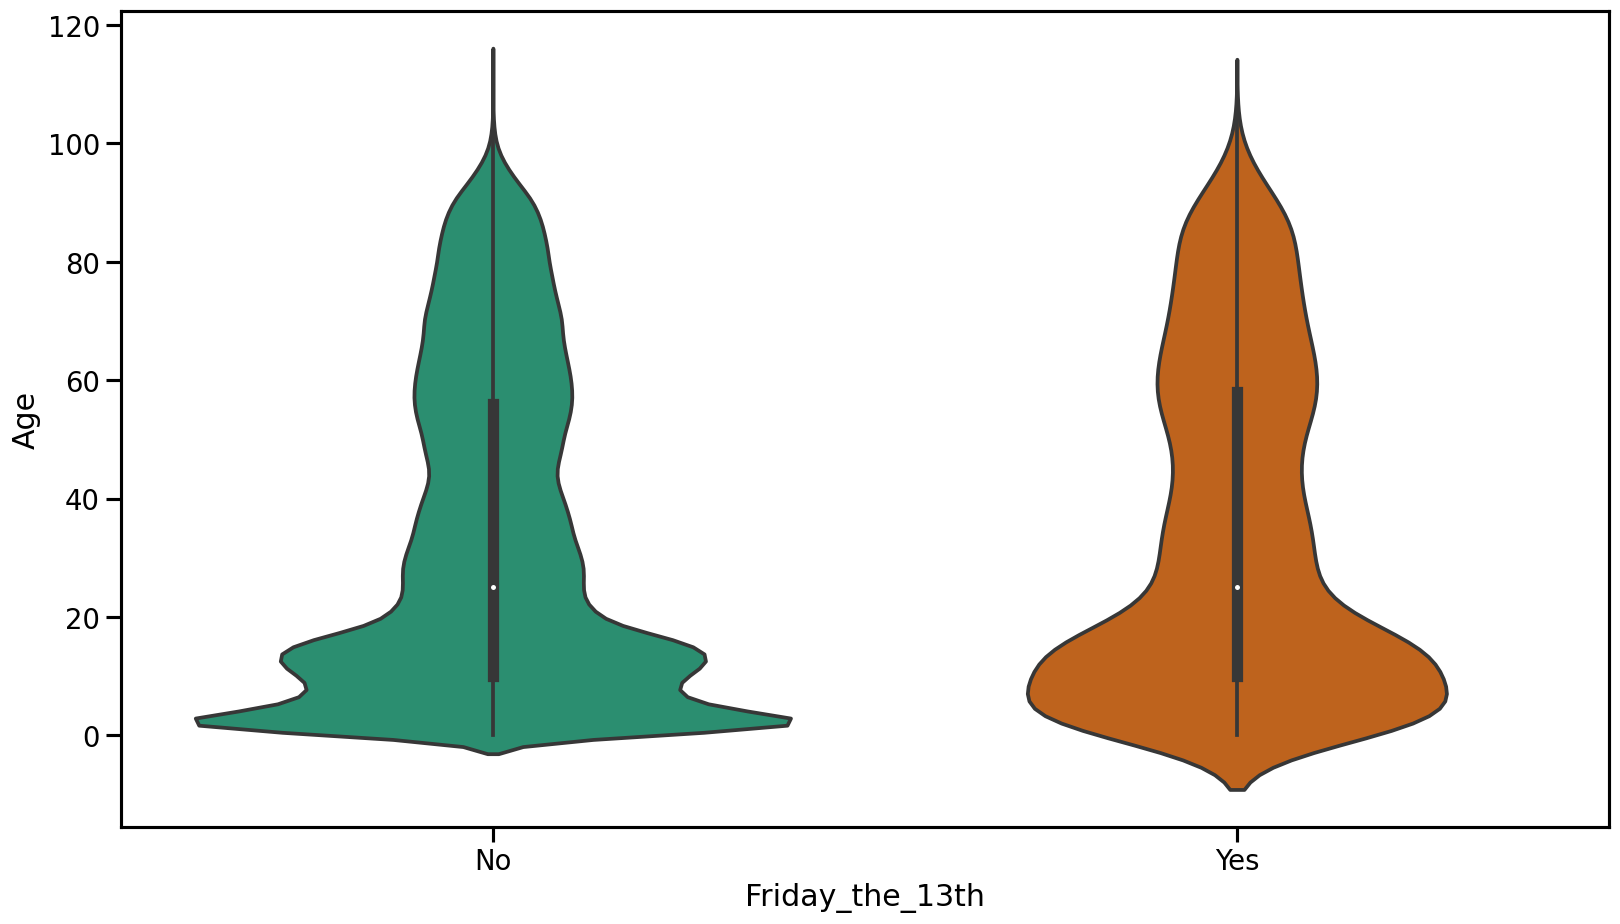

In [31]:
# Plot violin plot of age for each group
plt.figure(figsize=(16, 9), dpi=120)
sns.violinplot(x='Friday_the_13th', y='Age', data = df, palette="Dark2")
plt.savefig('images/age_plot.png', bbox_inches='tight')

Based on the plot and numerical summary above, there does not appear to be a significant difference in the distribution of injuries between both groups.

## 3. Relationship with Age

Finally, I wanted to know some interesting facts about the ages of the people who suffered from a specific injury. I achieved this by calculating the mean age of people in each category to see the typical age of people who get injured for that category.

### 3.1 Defining Function

I defined two functions that calculates the mean age and plots the results. Since there are many categories for *Product*, *Body Part*, and *Diagnosis*, I decided to focus only on the top 10 most common ones.

The functions are:

1. **get_mean_age()** - calculates the mean age in each category
2. **plot_mean_age()** - plots the mean age of each category

In [32]:
# Define function that calculates the average age
def get_mean_age(df, var, sort):
    return df.groupby(var).agg(count=(var, 'size'), mean_age=('Age', 'mean')).reset_index().round(1).sort_values(sort, ascending=False)

In [33]:
# Plot mean age
def plot_mean_age(df, var, label, color):
    
    ax = sns.barplot(y=var, x='mean_age', data=df, color=color)
    
    ax.set(xlabel='Mean Age', ylabel=label, title='Mean Age of the ' + label)

    for container in ax.containers:
        ax.bar_label(container)
        
    plt.savefig('images/'+ label + '_age_plot.png', bbox_inches='tight')

### 3.1 Age and Product

First, I looked at the mean age of people injured by the top 10 most common products.

In [34]:
# Get mean age for the top 10 most common product injuries
df_prod_age = get_mean_age(df, 'Product_1', 'count')

# Preview data
df_prod_age.head(10)

,Product_1,count,mean_age
283,FLOORS OR FLOORING MATERIALS,146550,54.30
675,STAIRS OR STEPS,139993,40.60
77,"BEDS OR BEDFRAMES, OTHER OR NOT SPECIFIED",101543,40.60
81,"BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR AL...",57579,28.70
65,"BASKETBALL, ACTIVITY AND RELATED EQUIPMENT",57162,18.10
123,"CHAIRS, OTHER OR NOT SPECIFIED",43810,43.10
290,"FOOTBALL (ACTIVITY, APPAREL OR EQUIPMENT)",41472,15.00
69,BATHTUBS OR SHOWERS,38002,44.60
119,CEILINGS AND WALLS (INTERIOR PART OF COMPLETED...,37675,31.00
251,"EXERCISE (ACTIVITY OR APPAREL, W/O EQUIP)",35280,39.60


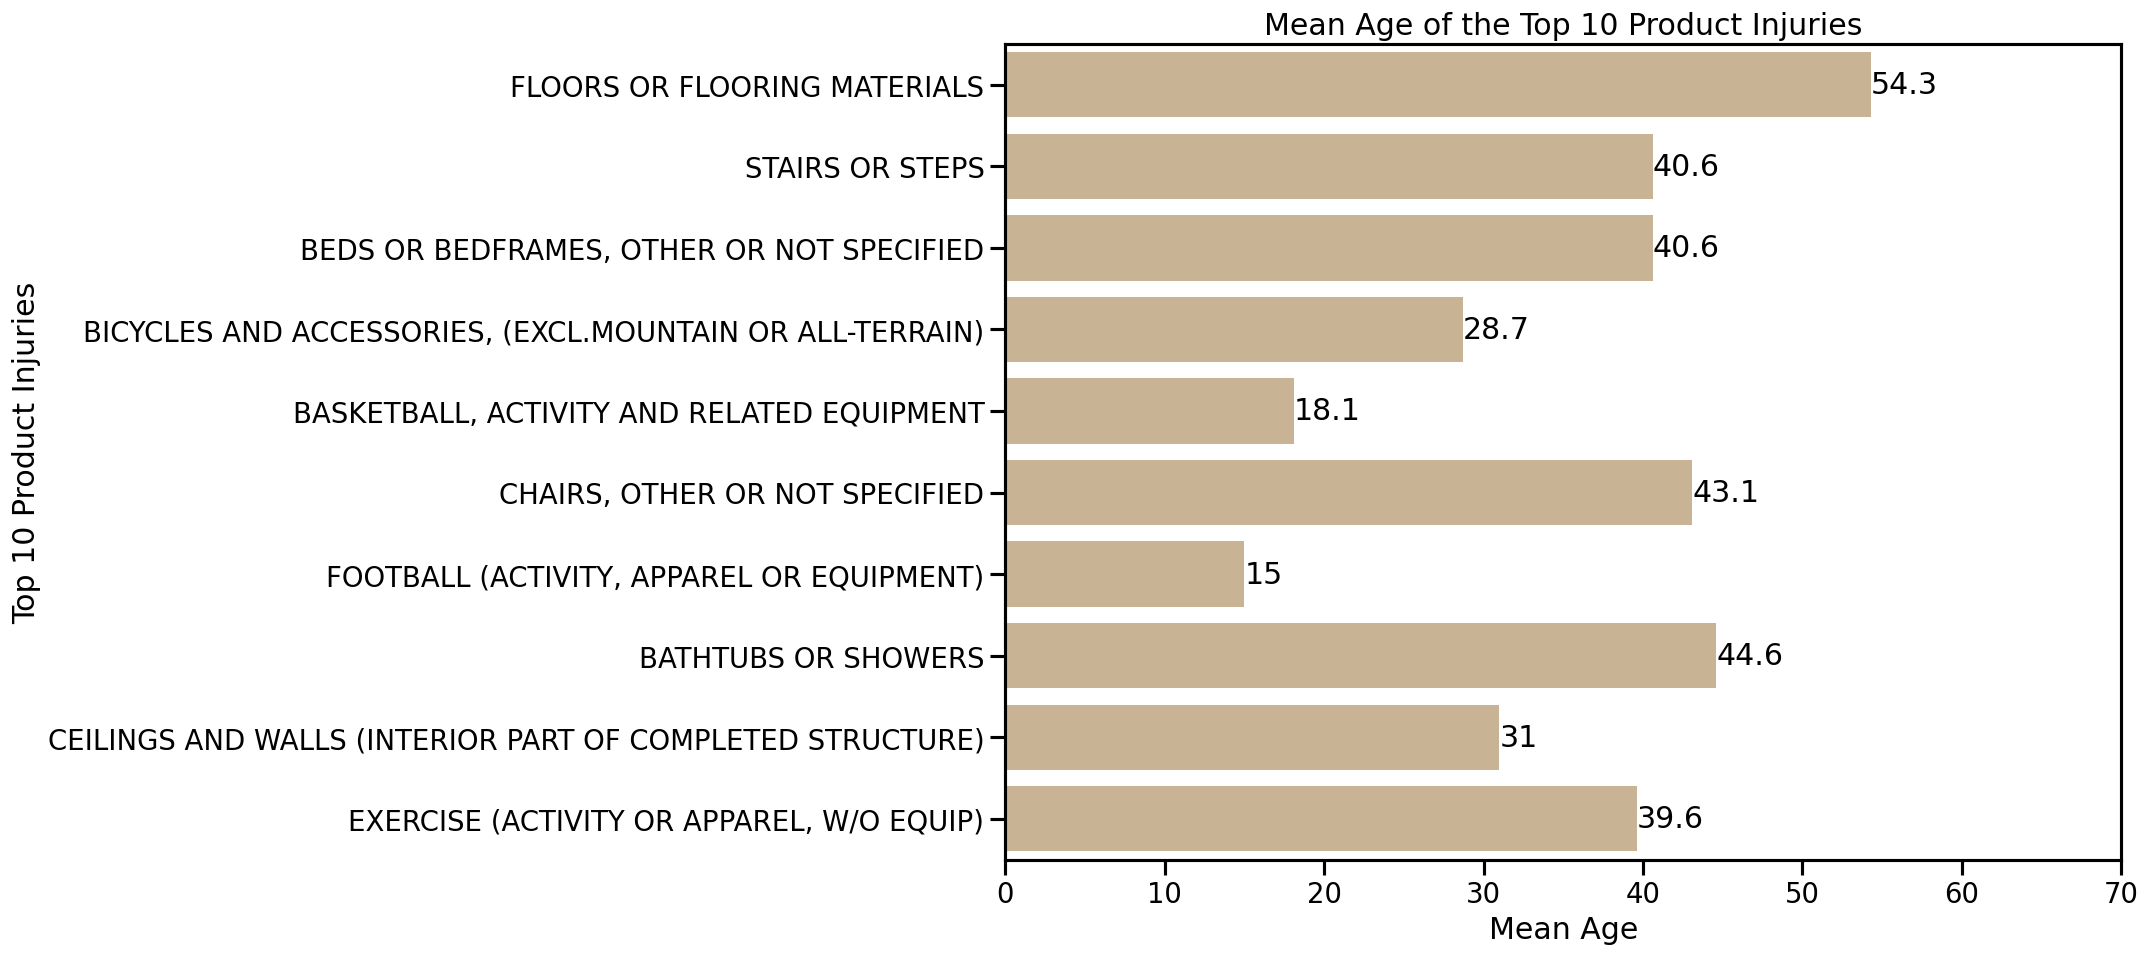

In [35]:
# Plot mean age of most common product injuries
plt.figure(figsize=(12, 9), dpi=120)
plt.xlim(0, 70)
plot_mean_age(df_prod_age.head(10), 'Product_1', 'Top 10 Product Injuries', 'tan')

Floors/flooring materials and bathtubs/showers have the highest mean age at 54.3 and 44.6 years old, respectively. Basketball and football have the lowest mean age at 18.1 and 15 years old, respectively.

Next, I wanted to see which categories have the highest mean age and the lowest mean age. I only included products with more than 100 cases.

In [36]:
# Sort mean age of product injuries by age
df_prod_age = get_mean_age(df, 'Product_1', 'mean_age')

In [37]:
# Show top highest mean age for product injuries with more than 100 cases
df_prod_age[df_prod_age['count'] >= 100].head(10)

,Product_1,count,mean_age
625,"SCALES, NOT ELEC. OR BATTERY OR NOT SPECIFIED",265,67.10
78,"BEDSPREADS, THROWS OR COMFORTERS",176,65.30
717,TOILETS,15777,63.40
459,"MOTORIZED VEHICLES, NEC (3 OR MORE WHEELS)",1526,63.10
615,"RUNNERS, THROW RUGS OR DOORMATS",1966,63.00
594,RECLINER CHAIR,3717,60.10
678,STEPLADDERS,1423,57.70
614,"RUGS OR CARPETS, NOT SPECIFIED",11519,56.90
411,LEAF BLOWERS,454,56.20
79,BENCH OR TABLE SAWS,3445,55.50


In [38]:
# Show top lowest mean age for product injuries with more than 100 cases
df_prod_age[df_prod_age['count'] >= 100].tail(10)

,Product_1,count,mean_age
698,TABLET OR CAPSULE DRUGS,4252,2.00
490,OTHER DRUGS OR MEDICATIONS,717,2.00
0,< 5 POISONINGS,310,1.90
30,ASPIRIN OR ASPIRIN COMPOUNDS,136,1.90
32,ATTACHED HIGHCHAIR,290,1.90
162,"COSMETICS, INCL FACIAL & EYE MAKE-UP, DEODORAN...",738,1.80
553,PORTABLE BABY SWINGS (FOR HOME USE),412,1.70
47,BABY CHANGING TABLES,775,1.70
419,LINIMENTS OR RUBBING COMPOUNDS,251,1.70
42,BABY BOUNCER SEATS (EXCL. JUMPERS),454,1.60


Scales have the highest mean age at 67.1 years old. However, toilets and rugs/carpet are among the highest mean age at 63.4 and 56.9 years old, respectively, with more than 10,000 cases.

Injuries from baby bouncer seats have the lowest mean age at 1.6 years old. However, injuries from tablets/capsule drugs have a mean age of 2.0 years old and have more than 4,000 cases.

### 3.2 Age and Body Part

Next, I looked at the mean age of people who injure a certain body part.

In [39]:
# Get mean age for the top 10 most common product injuries
df_body_age = get_mean_age(df, 'Body_Part', 'count')

# Preview data
df_body_age.head(10)

,Body_Part,count,mean_age
10,HEAD,301486,34.10
6,FACE,153398,24.50
15,LOWER TRUNK,142805,51.80
7,FINGER,140469,29.80
24,UPPER TRUNK,99061,47.40
2,ANKLE,91381,28.40
12,KNEE,87991,35.80
9,HAND,76560,31.10
8,FOOT,71898,29.80
20,SHOULDER,66761,38.80


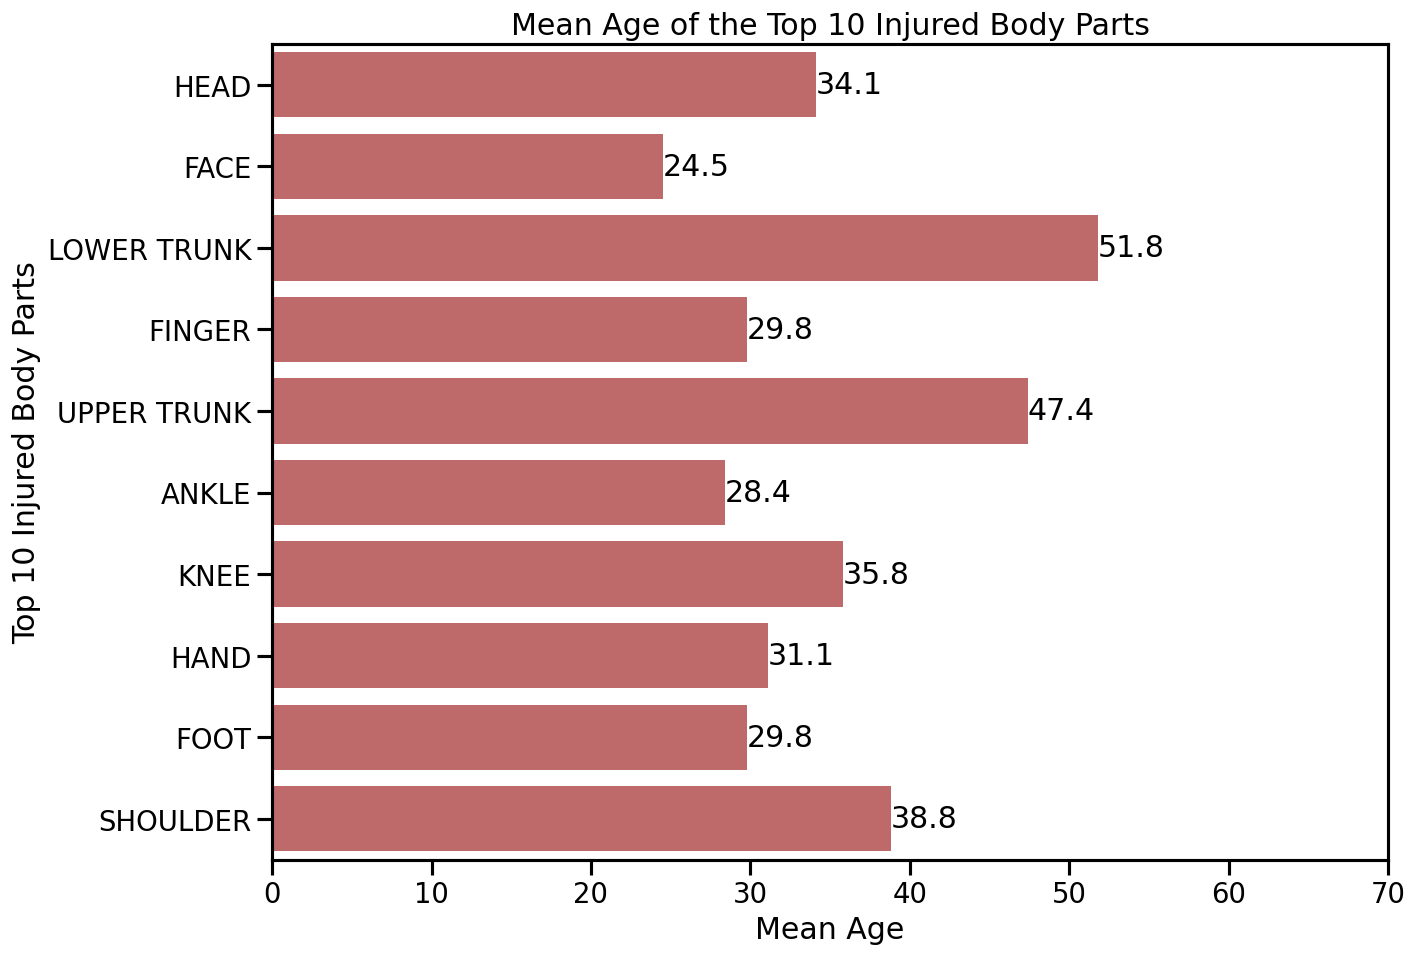

In [40]:
# Plot mean age of most common product injuries
plt.figure(figsize=(12, 9), dpi=120)
plt.xlim(0, 70)
plot_mean_age(df_body_age.head(10), 'Body_Part', 'Top 10 Injured Body Parts', 'indianred')

People who injure their lower and upper trunk tend to be older compared to the other body parts. The body part with the lowest mean age (in the top 10 injured body parts) is face with a mean age of 24.5 years old.

In [41]:
# Sort mean age of product injuries by age
df_body_age = get_mean_age(df, 'Body_Part', 'mean_age')

In [42]:
# Show top highest mean age for product injuries with more than 100 cases
df_body_age[df_body_age['count'] >= 100].head(10)

,Body_Part,count,mean_age
15,LOWER TRUNK,142805,51.80
18,NOT STATED/UNK,25105,49.40
24,UPPER TRUNK,99061,47.40
23,UPPER LEG,23852,41.20
17,NECK,28547,39.80
20,SHOULDER,66761,38.80
22,UPPER ARM,23982,37.70
12,KNEE,87991,35.80
14,LOWER LEG,64903,34.70
10,HEAD,301486,34.10


In [43]:
# Show top lowest mean age for product injuries with more than 100 cases
df_body_age[df_body_age['count'] >= 100].tail(10)

,Body_Part,count,mean_age
7,FINGER,140469,29.80
2,ANKLE,91381,28.40
5,EYEBALL,22967,28.10
13,LOWER ARM,62257,25.90
6,FACE,153398,24.50
4,ELBOW,40961,24.40
19,PUBIC REGION,9923,18.00
3,EAR,26069,16.00
16,MOUTH,36605,12.50
11,INTERNAL,20215,7.30


When it comes to the highest mean age, lower trunk, upper trunk, and unknown/not stated have the highest mean age.

Internal injuries have the lowest mean age at 7.3 years old. Injuries in the mouth, ear, and pubic region have a mean age in the teens at 12.5, 16.0, and 18.0 years old, respectively.

### 3.3 Age and Diagnosis

Finally, I look at the average age of the people who have a specific diagnosis.

In [44]:
# Get mean age for the top 10 most common product injuries
df_diagnosis_age = get_mean_age(df, 'Diagnosis', 'count')

# Preview data
df_diagnosis_age.head(10)

,Diagnosis,count,mean_age
24,OTHER,304259,39.00
22,LACERATION,297654,28.20
17,FRACTURE,285840,37.90
10,"CONTUSIONS, ABR.",211249,34.80
28,"STRAIN, SPRAIN",195567,31.30
21,INTERNAL INJURY,195083,35.40
9,CONCUSSION,35901,22.10
16,FOREIGN BODY,35442,19.90
14,DISLOCATION,27249,30.60
25,POISONING,20887,18.40


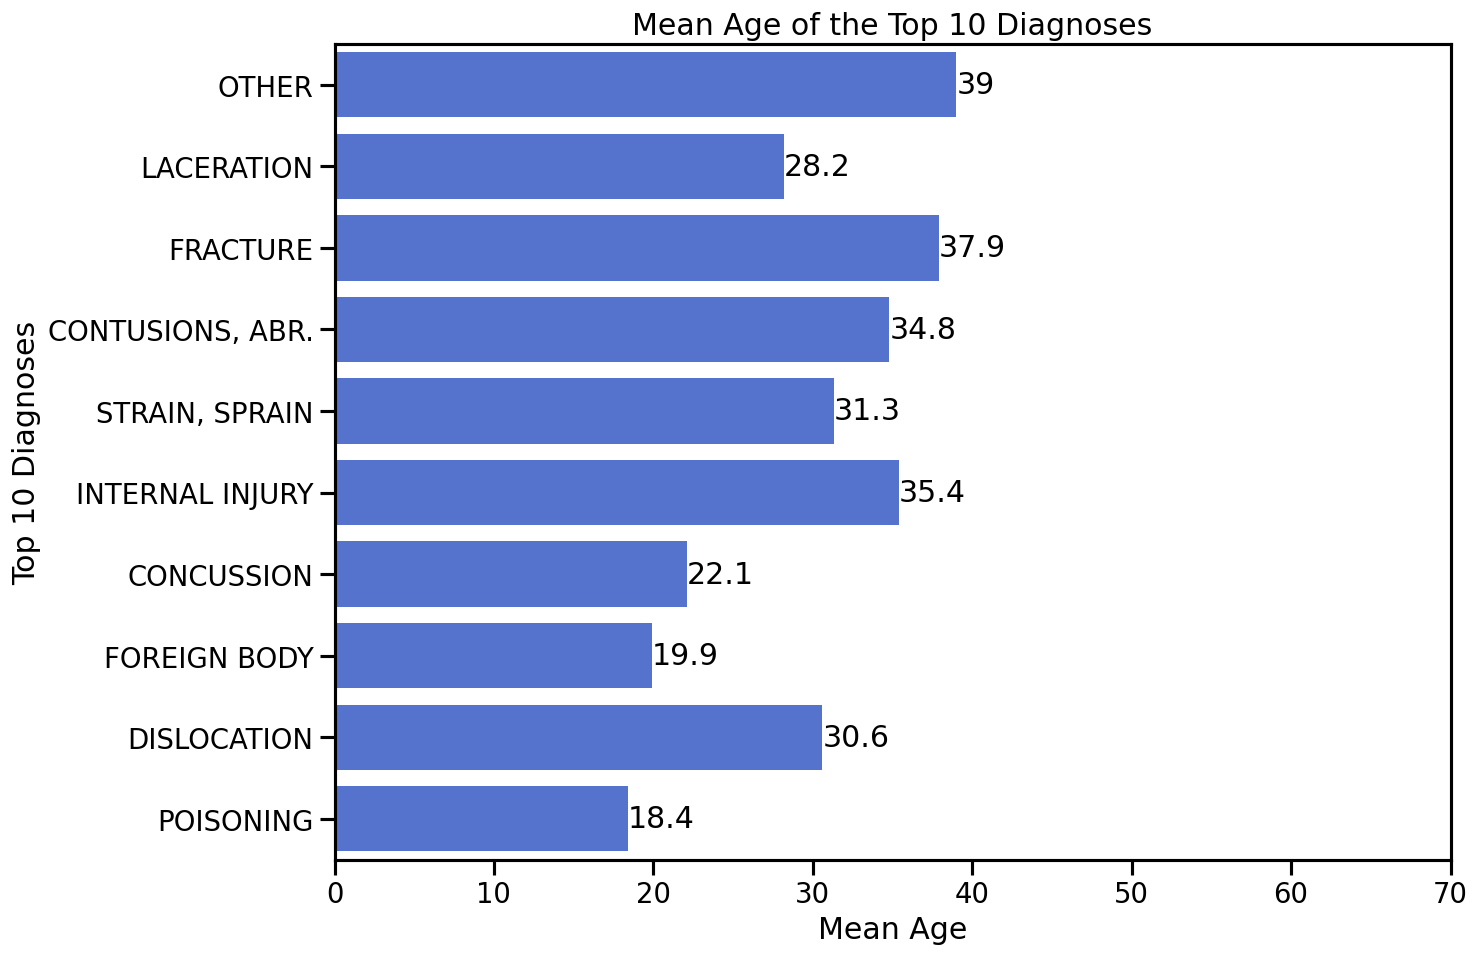

In [45]:
# Plot mean age of most common product injuries
plt.figure(figsize=(12, 9), dpi=120)
plt.xlim(0, 70)
plot_mean_age(df_diagnosis_age.head(10), 'Diagnosis', 'Top 10 Diagnoses', 'royalblue')

When it comes to the top 10 most common injury diagnoses, fractures, internal injuries, contusions, and "other" diagnoses have the highest mean age while foreign body and poisoning diagnoses have the lowest mean age.

In [46]:
# Sort mean age of product injuries by age
df_diagnosis_age = get_mean_age(df, 'Diagnosis', 'mean_age')

# Show top highest mean age for product injuries with more than 100 cases
df_diagnosis_age[df_diagnosis_age['count'] >= 100].head(10)

,Diagnosis,count,mean_age
3,AVULSION,12756,49.70
23,NERVE DAMAGE,7656,48.40
18,HEMATOMA,20753,40.70
24,OTHER,304259,39.00
17,FRACTURE,285840,37.90
0,AMPUTATION,3533,36.80
21,INTERNAL INJURY,195083,35.40
10,"CONTUSIONS, ABR.",211249,34.80
6,"BURN, NOT SPEC.",297,33.50
1,ANOXIA,5107,32.10


In [47]:
# Show top lowest mean age for product injuries with more than 100 cases
df_diagnosis_age[df_diagnosis_age['count'] >= 100].tail(10)

,Diagnosis,count,mean_age
7,"BURN, SCALD",12342,23.30
9,CONCUSSION,35901,22.10
11,CRUSHING,4161,20.90
16,FOREIGN BODY,35442,19.90
25,POISONING,20887,18.40
5,"BURN, ELECTRICAL",520,16.20
12,DENTAL INJURY,9151,10.80
29,SUBMERSION,2201,8.50
2,ASPIRATION,2621,7.70
20,INGESTION,17591,7.20


Avulsions and nerve damage have the overall highest mean age while ingestion and aspiration have the lowest mean age. 

## 4. Conclusion

Overall, there does not appear to be a significant difference in the number of injuries that occur on Friday the 13th compared to other days. We also explored other variables such as age, sex, product, etc. and found no association with Friday the 13th, with the exception of sports-related injuries that is most likely due to sporting events frequently taking place on Fridays. Thus, at least in terms of injury, there is nothing to worry about on Friday the 13th!

Treatment date was used as a proxy for the date that the injury occured. Since these days could be different, this dataset might not be the best representation of injuries occurring on Friday the 13th. A better dataset might be retrieved from emergency department cases where the injury most likely occurred on the same day.